<a href="https://colab.research.google.com/github/jahnavim111/Hand_Written_Digit_Recognition/blob/main/Project_1_HandWritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from PIL import Image
import numpy as np

# **2. Load DataSet**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

**Displaying Data**

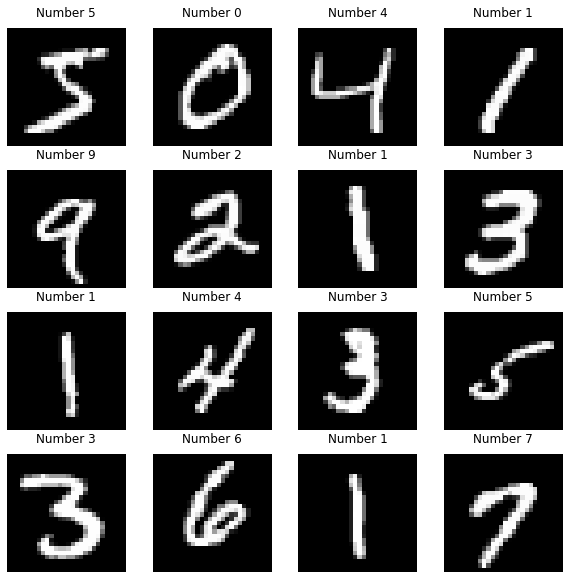

In [ ]:
#%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (10, 10))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

# Other Method
# for i in range(0,10):
#   plt.figure(figsize=(2,2))
#   plt.imshow(x_train[i])
#   print(y_train[i])
#   plt.show()


# **3. Preprocess the Data**

In [ ]:
# reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print('Dimension',x_train.ndim)
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


Dimension 4
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
# Normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# **4. Create Model**

In [ ]:
no_of_classes = 10

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(no_of_classes,activation=tf.nn.softmax))

# **5. Train the Model**

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2000 - accuracy: 0.9403
Epoch 2/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0833 - accuracy: 0.9750
Epoch 3/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0581 - accuracy: 0.9815


# **6. Evaluate the model**

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0502 - accuracy: 0.9843
Test loss: 0.050226081162691116
Test accuracy: 0.9843000173568726


# **7. Predict the model**

In [ ]:
p = model.predict(x_test)

In [ ]:
print(p[0])

[3.2001002e-09 2.1104063e-09 1.1859572e-07 1.7986356e-07 2.3029293e-12
 2.7130393e-11 4.1409598e-17 9.9999964e-01 7.2156470e-10 1.5392905e-08]


# **Predictions of loaded image**

Number Predicted: 8 , Accuracy: 98%


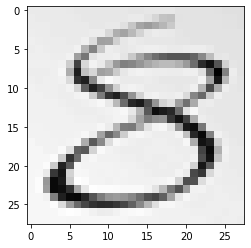

In [ ]:
image = np.array(Image.open("eight.jpg").resize((28,28)).convert('L'))
plt.imshow(image)
image = image.reshape(1,28,28,1)
image = image/255.0
res = model.predict([image])[0]
print('Number Predicted: '+str(np.argmax(res))+' , Accuracy: '+ str(int(max(res)*100))+'%')

